# Product Analysis for Effective Offer Development: Identifying Primary and Secondary Features for Enhanced Customer Response

# Content

1. Project Description
    * Introduction and Objectives
    * Data Description
    * Steps Taken to Complete the Project
2. Data Overview
3. Pra-Processing Data
4. Analysis Data Exploration (EDA)
5. Hypothesis Testing
6. Conclusion and Recommendations

# Project Description

**Introduction and Objectives**

The project manager responsible for the product line is requesting an analysis to determine which products belong to the primary and secondary ranges. This analysis needs to be conducted continuously throughout the project period. The analysis process involves not only qualitative research but also data-driven research. The results of this analysis will be presented to the project manager as a foundation for making more informative and strategic decisions.

The main objective of this analysis is to formulate more effective product offerings to customers by considering the sustainability of relevant secondary items and optimizing the procurement process. By focusing on identifying products in the primary and secondary ranges, this project can enhance operational efficiency and improve customer response to product offerings.

**Data Description**

We have a dataset containing transaction history from Everything Plus, an online store selling household goods. The dataset, `ecommerce_dataset_us.csv`, includes the following columns:

`InvoiceNo`: Order identifier

`StockCode`: Item identifier

`Description`: Item name

`Quantity`: Quantity ordered

`InvoiceDate`: Order date

`UnitPrice`: Price per item

`CustomerID`: Customer identifier

**Steps Taken to Complete the Project**

Discovering basic store metrics:

* Revenue trends
* Average purchase size and trends
* Average revenue per user month over month
* Additionally, the analysis requires:

Identifying:
* Items frequently bought individually versus those commonly purchased together (primary and secondary ranges)
* Item groups often included in additional purchases
* Sets of product groups frequently found in user carts
* Determining the proportion of total browsing area occupied by secondary regions
* Subsequently, forming segments based on user purchases. Analyzing user purchases and grouping items by product category. 

Then, formulating and testing statistical hypotheses:
1. Formulating and testing hypotheses regarding price differences between various categories of items
2. Formulating statistical hypotheses related to dataset and conducting tests
3. Visualizing data

# Data Overview

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime, timedelta
from scipy import stats as st
import datetime as dt

In [2]:
df = pd.read_csv('/datasets/ecommerce_dataset_us.csv', sep='\t')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,11/29/2018 08:26,2.55,17850.0
1,536365,71053,WHITE METAL LANTERN,6,11/29/2018 08:26,3.39,17850.0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,11/29/2018 08:26,2.75,17850.0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,11/29/2018 08:26,3.39,17850.0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,11/29/2018 08:26,3.39,17850.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 28.9+ MB


From the data information, the following findings can be identified:

* The dataset contains 541,909 rows.
* There are missing rows in the `Description` and `CustomerID` columns.
* Column names can be standardized for clarity.
* Data types should be adjusted, specifically converting `InvoiceDate` to datetime format and `CustomerID` to integer data type (assuming `CustomerID` is an integer).

## Pra-Processing Data

**Standardize column names**

In [4]:
df = df.rename(columns = {'InvoiceNo': 'invoice_no', 'StockCode': 'stock_code', 'Description': 'description', 'Quantity': 'quantity', 'InvoiceDate': 'invoice_date', 'UnitPrice': 'unit_price', 'CustomerID': 'customer_id'})
df.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id'],
      dtype='object')

**Check duplicate data**

In [5]:
duplicated_df = df.duplicated().sum()
duplicated_df/len(df)

0.009721189350979592

There are fewer than 1% duplicate data entries, and the decision has been made to remove these duplicates to ensure they do not affect the analysis later on.

In [6]:
# menghapus data duplikat
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    536641 non-null  object 
 1   stock_code    536641 non-null  object 
 2   description   535187 non-null  object 
 3   quantity      536641 non-null  int64  
 4   invoice_date  536641 non-null  object 
 5   unit_price    536641 non-null  float64
 6   customer_id   401604 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 32.8+ MB


After removing duplicate values, there are 536,641 records remaining. Next, we still need to review the missing values.

**Check missing values**

In [7]:
df.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135037
dtype: int64

There are missing values in the `Description` column amounting to 0.2% of the data, and in the `CustomerID` column, it constitutes 25% of the total data.

In [8]:
df[df['customer_id'].isna()]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
622,536414,22139,NaN,56,11/29/2018 11:52,0.00,NaN
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,11/29/2018 14:32,2.51,NaN
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,11/29/2018 14:32,2.51,NaN
1445,536544,21786,POLKADOT RAIN HAT,4,11/29/2018 14:32,0.85,NaN
1446,536544,21787,RAIN PONCHO RETROSPOT,2,11/29/2018 14:32,1.66,NaN
...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,12/07/2019 10:26,4.13,NaN
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,12/07/2019 10:26,4.13,NaN
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,12/07/2019 10:26,4.96,NaN
541539,581498,85174,S/4 CACTI CANDLES,1,12/07/2019 10:26,10.79,NaN


In [9]:
df[df['description'].isna()]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id
622,536414,22139,NaN,56,11/29/2018 11:52,0.0,NaN
1970,536545,21134,NaN,1,11/29/2018 14:32,0.0,NaN
1971,536546,22145,NaN,1,11/29/2018 14:33,0.0,NaN
1972,536547,37509,NaN,1,11/29/2018 14:33,0.0,NaN
1987,536549,85226A,NaN,1,11/29/2018 14:34,0.0,NaN
...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,12/05/2019 18:26,0.0,NaN
535326,581203,23406,NaN,15,12/05/2019 18:31,0.0,NaN
535332,581209,21620,NaN,6,12/05/2019 18:35,0.0,NaN
536981,581234,72817,NaN,27,12/06/2019 10:33,0.0,NaN


Since the missing values in the `Description` column typically coincide with those in the `CustomerID` column, it has been decided to remove the missing values from the `Description` column.

In [10]:
df.dropna(subset=['description'], inplace=True)

Handling missing values in the `CustomerID` column, due to the substantial number, involves replacing the missing values with 0, indicating that 0 represents customers without an ID.

In [11]:
df['customer_id'] = df['customer_id'].fillna(0)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535187 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    535187 non-null  object 
 1   stock_code    535187 non-null  object 
 2   description   535187 non-null  object 
 3   quantity      535187 non-null  int64  
 4   invoice_date  535187 non-null  object 
 5   unit_price    535187 non-null  float64
 6   customer_id   535187 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 32.7+ MB


The data is now complete, with no missing values.

**Data type**

In [13]:
# Mengonversi InvoiceDate menjadi tipe data datetime
df['invoice_date'] = pd.to_datetime(df['invoice_date'])

# Mengonversi CustomerID ke tipe data integer (jika CustomerID adalah bilangan bulat)
df['customer_id'] = df['customer_id'].astype('Int64')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 535187 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    535187 non-null  object        
 1   stock_code    535187 non-null  object        
 2   description   535187 non-null  object        
 3   quantity      535187 non-null  int64         
 4   invoice_date  535187 non-null  datetime64[ns]
 5   unit_price    535187 non-null  float64       
 6   customer_id   535187 non-null  Int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 33.2+ MB


The data is now ready for further analysis.

## Analysis Data Eksploration (EDA)

**Revenue Trend**

In [15]:
# Menghitung pendapatan untuk setiap transaksi
df['revenue'] = df['quantity'] * df['unit_price']

# Menambahkan kolom 'date' yang hanya berisi tanggal
df['date'] = df['invoice_date'].dt.date
df['date'] = pd.to_datetime(df['date'])
df.sample(5)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,revenue,date
490971,578065,82567,"AIRLINE LOUNGE,METAL SIGN",1,2019-11-20 15:41:00,1.63,0,1.63,2019-11-20
489975,578033,22727,ALARM CLOCK BAKELIKE RED,4,2019-11-20 13:42:00,3.75,12656,15.00,2019-11-20
416376,572552,23221,REINDEER HEART DECORATION SILVER,2,2019-10-22 17:07:00,1.63,14096,3.26,2019-10-22
107879,545465,84228,HEN HOUSE W CHICK STANDING,12,2019-03-01 09:25:00,0.42,16957,5.04,2019-03-01
128440,547327,23052,RECYCLED ACAPULCO MAT TURQUOISE,2,2019-03-20 11:28:00,8.25,12681,16.50,2019-03-20


In [16]:
df.describe()

,quantity,unit_price,customer_id,revenue
count,535187.000000,535187.000000,535187.000000,535187.000000
mean,9.671593,4.645242,11466.973804,18.173100
std,219.059056,97.364810,6778.037985,381.171824
min,-80995.000000,-11062.060000,0.000000,-168469.600000
25%,1.000000,1.250000,12348.000000,3.750000
50%,3.000000,2.080000,14360.000000,9.900000
75%,10.000000,4.130000,16242.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


The presence of negative values in the `quantity` and `unit_price` columns affects the revenue calculation negatively as well.

In [17]:
# meninjau jumlah quantity<0
df[df['quantity']<0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,revenue,date
141,C536379,D,Discount,-1,2018-11-29 09:41:00,27.50,14527,-27.50,2018-11-29
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2018-11-29 09:49:00,4.65,15311,-4.65,2018-11-29
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2018-11-29 10:24:00,1.65,17548,-19.80,2018-11-29
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548,-6.96,2018-11-29
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2018-11-29 10:24:00,0.29,17548,-6.96,2018-11-29
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2019-12-07 09:57:00,0.83,14397,-9.13,2019-12-07
541541,C581499,M,Manual,-1,2019-12-07 10:28:00,224.69,15498,-224.69,2019-12-07
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2019-12-07 11:57:00,10.95,15311,-54.75,2019-12-07
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2019-12-07 11:58:00,1.25,17315,-1.25,2019-12-07


In [18]:
# meninjau jumlah quantity=0
df[df['quantity']==0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,revenue,date


In [19]:
# meninjau jumlah unit_price=0
df[df['unit_price']==0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,revenue,date
6391,536941,22734,amazon,20,2018-12-01 12:08:00,0.0,0,0.0,2018-12-01
6392,536942,22139,amazon,15,2018-12-01 12:08:00,0.0,0,0.0,2018-12-01
7313,537032,21275,?,-30,2018-12-01 16:50:00,0.0,0,-0.0,2018-12-01
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,2018-12-03 14:02:00,0.0,12647,0.0,2018-12-03
13217,537425,84968F,check,-20,2018-12-04 15:35:00,0.0,0,-0.0,2018-12-04
...,...,...,...,...,...,...,...,...,...
535336,581213,22576,check,-30,2019-12-05 18:38:00,0.0,0,-0.0,2019-12-05
536908,581226,23090,missing,-338,2019-12-06 09:56:00,0.0,0,-0.0,2019-12-06
538504,581406,46000M,POLYESTER FILLER PAD 45x45cm,240,2019-12-06 13:58:00,0.0,0,0.0,2019-12-06
538505,581406,46000S,POLYESTER FILLER PAD 40x40cm,300,2019-12-06 13:58:00,0.0,0,0.0,2019-12-06


In [20]:
# meninjau jumlah unit_price<0
df[df['unit_price']<0]

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,revenue,date
299983,A563186,B,Adjust bad debt,1,2019-08-10 14:51:00,-11062.06,0,-11062.06,2019-08-10
299984,A563187,B,Adjust bad debt,1,2019-08-10 14:52:00,-11062.06,0,-11062.06,2019-08-10


* There are 9725 data points with quantity values less than or equal to 0, accounting for 1.8% of the total data. 
* Additionally, unit_price represents the price per unit of the sold item, which typically should not be negative. However, in some cases, negative values in unit_price may occur due to product returns or significant discounts where the refund amount exceeds the original price of the item. 
* Upon further examination, it was found that there are 2 purchases with negative prices and 582 (0.1%) with a unit_price of 0.

To ensure the integrity of the analysis, as purchases cannot logically have negative values, it has been decided to remove these extreme values.

In [21]:
# mengambil data quantity dan unit_price yang nilainya hanya positif
df = df[(df['quantity'] > 0) & (df['unit_price'] > 0)]
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,revenue,date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,15.30,2018-11-29
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,22.00,2018-11-29
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680,10.20,2019-12-07
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680,12.60,2019-12-07
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680,16.60,2019-12-07
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680,16.60,2019-12-07


In [22]:
df.describe()

,quantity,unit_price,customer_id,revenue
count,524878.000000,524878.000000,524878.000000,524878.000000
mean,10.616600,3.922573,11437.732164,20.275399
std,156.280031,36.093028,6799.513627,271.693566
min,1.000000,0.001000,0.000000,0.001000
25%,1.000000,1.250000,0.000000,3.900000
50%,4.000000,2.080000,14350.000000,9.920000
75%,11.000000,4.130000,16245.000000,17.700000
max,80995.000000,13541.330000,18287.000000,168469.600000


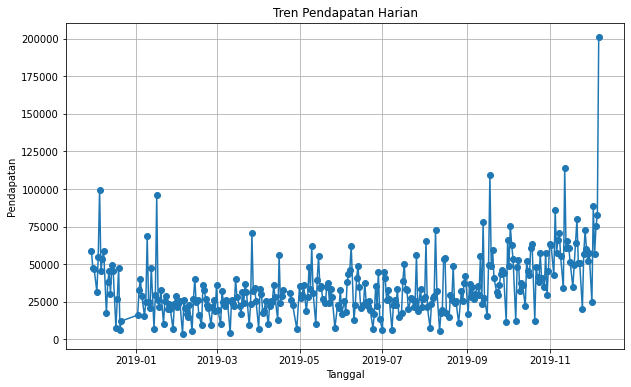

In [23]:
# Mengelompokkan data berdasarkan tanggal transaksi dan menghitung total pendapatan harian
daily_revenue = df.groupby(pd.to_datetime(df['date']))['revenue'].sum()

plt.figure(figsize=(10, 6))
plt.plot(daily_revenue.index, daily_revenue.values, marker='o', linestyle='-')
plt.title('Tren Pendapatan Harian')
plt.xlabel('Tanggal')
plt.ylabel('Pendapatan')
plt.grid(True)
plt.show()

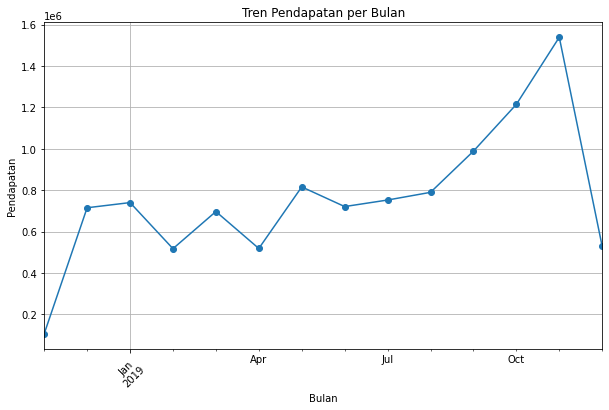

In [24]:
# Mengelompokkan data per bulan dan menghitung total pendapatan
monthly_revenue = df.groupby(df['date'].dt.to_period('M'))['revenue'].sum()

# Plot tren pendapatan per bulan
plt.figure(figsize=(10, 6))
monthly_revenue.plot(marker='o', linestyle='-')
plt.title('Tren Pendapatan per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Pendapatan')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

We can see the examining daily revenue, it shows significant fluctuations. Therefore, a review was conducted on the monthly revenue trends, revealing an overall increase from January to late November 2019. Although there was a decline in revenue between January and June, it notably surged towards the end of November 2019.

**The average purchase size and its trend**

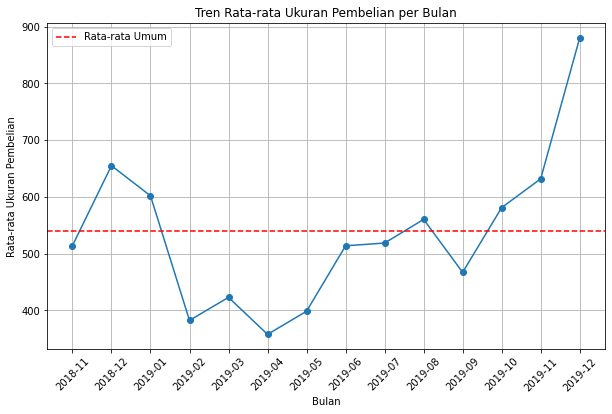

In [25]:
# Menghitung ukuran pembelian per transaksi
df['purchase_size'] = df.groupby('invoice_no')['quantity'].transform('sum')

# Menghitung rata-rata ukuran pembelian
average_purchase_size = df['purchase_size'].mean()
monthly_purchase_size = df.groupby(df['date'].dt.to_period('M'))['purchase_size'].mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_purchase_size.index.astype(str), monthly_purchase_size.values, marker='o', linestyle='-')
plt.title('Tren Rata-rata Ukuran Pembelian per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Ukuran Pembelian')
plt.grid(True)
plt.xticks(rotation=45)
plt.axhline(y=average_purchase_size, color='r', linestyle='--', label='Rata-rata Umum')
plt.legend()
plt.show()

The trend in average purchase size shows a decline, falling below the average purchase size from February to July 2019, indicating fewer items purchased during this period. Towards the end of the year, from October to December 2019, there was a rapid increase in purchase size, suggesting that many users engaged in transactions towards the year-end.

**Trend in average revenue per user month-to-month**

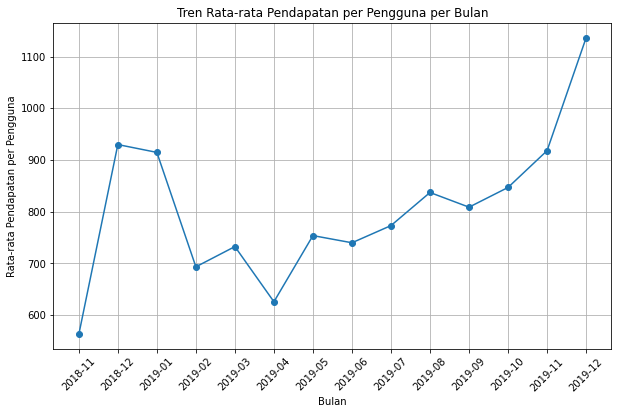

In [26]:
# Mengelompokkan data per bulan dan per pengguna, dan menghitung total pendapatan
monthly_revenue_per_user = df.groupby([df['date'].dt.to_period('M'), 'customer_id'])['revenue'].sum().reset_index()

# Menghitung rata-rata pendapatan per pengguna untuk setiap bulan
average_revenue_per_user = monthly_revenue_per_user.groupby('date')['revenue'].mean()

# Plot tren rata-rata pendapatan per pengguna setiap bulan
plt.figure(figsize=(10, 6))
plt.plot(average_revenue_per_user.index.astype(str), average_revenue_per_user.values, marker='o', linestyle='-')
plt.title('Tren Rata-rata Pendapatan per Pengguna per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Rata-rata Pendapatan per Pengguna')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

User behavior changes over time, with a tendency for users to shop more from mid to late year, similar to the monthly revenue trend, as reflected in the quantity of items purchased or the size of purchases by users.

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 524878 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   invoice_no     524878 non-null  object        
 1   stock_code     524878 non-null  object        
 2   description    524878 non-null  object        
 3   quantity       524878 non-null  int64         
 4   invoice_date   524878 non-null  datetime64[ns]
 5   unit_price     524878 non-null  float64       
 6   customer_id    524878 non-null  Int64         
 7   revenue        524878 non-null  float64       
 8   date           524878 non-null  datetime64[ns]
 9   purchase_size  524878 non-null  int64         
dtypes: Int64(1), datetime64[ns](2), float64(2), int64(2), object(3)
memory usage: 44.6+ MB


**Products that are frequently purchased individually and those that are commonly bought together with other items (primary and secondary ranges)**

In [28]:
Q1 = df['revenue'].quantile(0.25)
Q3 = df['revenue'].quantile(0.75)
IQR = Q3 - Q1
# Batas bawah dan batas atas untuk rentang utama
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Barang-barang yang masuk ke dalam rentang utama
barang_rentang_utama = df[(df['revenue'] >= lower_bound) & (df['revenue'] <= upper_bound)]
barang_rentang_utama

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,revenue,date,purchase_size
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,15.30,2018-11-29,40
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,40
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,22.00,2018-11-29,40
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,40
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,40
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680,10.20,2019-12-07,105
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680,12.60,2019-12-07,105
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680,16.60,2019-12-07,105
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680,16.60,2019-12-07,105


In [29]:
barang_rentang_utama.describe()

,quantity,unit_price,customer_id,revenue,purchase_size
count,482254.000000,482254.000000,482254.000000,482254.000000,482254.000000
mean,6.263830,3.140320,11308.772829,10.541462,475.833660
std,8.944853,3.260993,6892.503372,8.318965,592.012163
min,1.000000,0.001000,0.000000,0.001000,1.000000
25%,1.000000,1.250000,0.000000,3.400000,147.000000
50%,3.000000,2.080000,14341.000000,8.400000,294.000000
75%,9.000000,4.130000,16260.750000,15.900000,551.000000
max,900.000000,38.260000,18287.000000,38.400000,15049.000000


* The average purchase quantity is around 475.83, ranging from 1 to 15,049. This indicates a significant variation in the sizes of purchases made by customers, although the range is smaller compared to the secondary range.
* On average, about 6 items are sold with revenue approximately at 10.54 unit prices per transaction. The number of items sold and revenue per transaction tends to be lower compared to the secondary range.

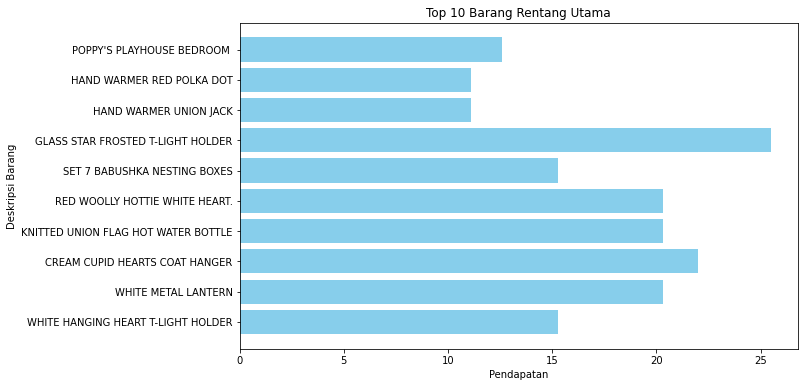

In [30]:
top_10_barang_rentang_utama = barang_rentang_utama.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_barang_rentang_utama['description'], top_10_barang_rentang_utama['revenue'], color='skyblue')
plt.xlabel('Pendapatan')
plt.ylabel('Deskripsi Barang')
plt.title('Top 10 Barang Rentang Utama')
plt.show()

Items that are frequently purchased individually (primary range) generate revenue above $10 and above.

In [31]:
barang_rentang_sekunder = df[(df['revenue'] < lower_bound) | (df['revenue'] > upper_bound)]
barang_rentang_sekunder

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,revenue,date,purchase_size
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2018-11-29 08:34:00,1.69,13047,54.08,2018-11-29,83
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2018-11-29 08:45:00,3.75,12583,90.00,2018-11-29,449
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2018-11-29 08:45:00,3.75,12583,90.00,2018-11-29,449
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2018-11-29 08:45:00,3.75,12583,45.00,2018-11-29,449
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2018-11-29 08:45:00,0.85,12583,40.80,2018-11-29,449
...,...,...,...,...,...,...,...,...,...,...
541866,581583,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,36,2019-12-07 12:23:00,1.85,13777,66.60,2019-12-07,76
541867,581584,20832,RED FLOCK LOVE HEART PHOTO FRAME,72,2019-12-07 12:25:00,0.72,13777,51.84,2019-12-07,120
541868,581584,85038,6 CHOCOLATE LOVE HEART T-LIGHTS,48,2019-12-07 12:25:00,1.85,13777,88.80,2019-12-07,120
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2019-12-07 12:49:00,8.95,13113,214.80,2019-12-07,66


In [32]:
barang_rentang_sekunder.describe()

,quantity,unit_price,customer_id,revenue,purchase_size
count,42624.000000,42624.000000,42624.000000,42624.000000,42624.000000
mean,59.864466,12.773090,12896.796429,130.406540,1263.918544
std,545.174513,125.843099,5432.468973,946.061988,2363.614677
min,1.000000,0.060000,0.000000,38.500000,1.000000
25%,12.000000,1.650000,12756.750000,49.800000,216.000000
50%,24.000000,2.950000,14439.000000,70.200000,470.000000
75%,50.000000,6.350000,16133.000000,120.495000,1145.000000
max,80995.000000,13541.330000,18287.000000,168469.600000,80995.000000


* The purchase quantity or size averages around 1263.92, with a considerable range from 1 to 80995. This indicates significant variability in the sizes of purchases made by customers. 
* There are some outliers observed in certain variables, especially in quantity and revenue. It can be assumed that there are customers who make purchases of large quantities of items.

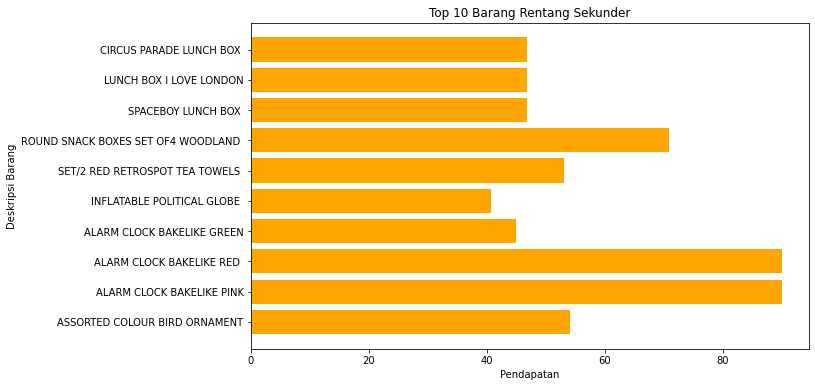

In [33]:
top_10_barang_rentang_sekunder = barang_rentang_sekunder.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_barang_rentang_sekunder['description'], top_10_barang_rentang_sekunder['revenue'], color='orange')
plt.xlabel('Pendapatan')
plt.ylabel('Deskripsi Barang')
plt.title('Top 10 Barang Rentang Sekunder')
plt.show()

The types of items that are more frequently purchased together with other items (secondary range) generate revenue above $40.

**Which groups of items tend to fall within the additional range?**

In [34]:
df

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,revenue,date,purchase_size
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2018-11-29 08:26:00,2.55,17850,15.30,2018-11-29,40
1,536365,71053,WHITE METAL LANTERN,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,40
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2018-11-29 08:26:00,2.75,17850,22.00,2018-11-29,40
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,40
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2018-11-29 08:26:00,3.39,17850,20.34,2018-11-29,40
...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2019-12-07 12:50:00,0.85,12680,10.20,2019-12-07,105
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2019-12-07 12:50:00,2.10,12680,12.60,2019-12-07,105
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2019-12-07 12:50:00,4.15,12680,16.60,2019-12-07,105
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2019-12-07 12:50:00,4.15,12680,16.60,2019-12-07,105


In [35]:
jumlah_rentang_utama = df[(df['revenue'] >= lower_bound) & (df['revenue'] <= upper_bound)].shape[0]
jumlah_rentang_sekunder = df[(df['revenue'] < lower_bound) | (df['revenue'] > upper_bound)].shape[0]

total_pembelian = jumlah_rentang_utama + jumlah_rentang_sekunder

proporsi_rentang_sekunder = jumlah_rentang_sekunder / total_pembelian

if proporsi_rentang_sekunder > 0.5:
    print("Rentang sekunder cenderung berada dalam kisaran tambahan.")
elif proporsi_rentang_sekunder < 0.5:
    print("Rentang utama cenderung berada dalam kisaran tambahan.")
else:
    print("Tidak ada perbedaan yang signifikan antara rentang utama dan rentang sekunder dalam hal kisaran tambahan.")

Rentang utama cenderung berada dalam kisaran tambahan.


The group of items that fall within the additional range tends to be primary range items, as the proportion of purchases of primary range items is higher compared to purchases of secondary range items. Items in the primary range may have a higher frequency of purchase than those in the secondary range. It can be assumed that customers more frequently buy items in the primary range than those in the secondary range.

**Which product groups are frequently found in users' shopping carts?**

In [36]:
transaction_data = df.groupby(['invoice_no', 'description'])['quantity'].sum().unstack().reset_index().fillna(0).set_index('invoice_no')

# Ubah jumlah produk menjadi biner (0 atau 1)
transaction_data = transaction_data.applymap(lambda x: 1 if x > 0 else 0)

support = transaction_data.mean()

produk_dengan_dukungan_tinggi = support[support > 0.1]
produk_dengan_dukungan_tinggi

description
JUMBO BAG RED RETROSPOT               0.104659
WHITE HANGING HEART T-LIGHT HOLDER    0.113026
dtype: float64

We selected products that appear in at least 10% of all transactions, focusing on those purchased by a significant number of customers or appearing frequently in transactions: "JUMBO BAG RED RETROSPOT" with a support of approximately 10.47%, and "WHITE HANGING HEART T-LIGHT HOLDER" with a support of around 11.30%. This indicates that these products are often purchased together in a single transaction by the same users. It seems that acquiring the "WHITE HANGING HEART T-LIGHT HOLDER" requires a larger bag.

**How much of the total exploration area is occupied by the secondary region?**

In [37]:
jumlah_wilayah_sekunder = len(barang_rentang_sekunder)

total_jumlah_data = len(df)

persentase_wilayah_sekunder = (jumlah_wilayah_sekunder / total_jumlah_data) * 100

print("Persentase wilayah sekunder: {:.2f}%".format(persentase_wilayah_sekunder))

Persentase wilayah sekunder: 8.12%


Approximately 8.12% of total transactions or products have revenue outside the range designated as the primary range.

# Hypothesis Testing

**Formulating and testing hypotheses regarding price differences among various categories of products**

In this stage, we conducted hypothesis testing to determine if there are price differences between primary and secondary range products. The aim is to formulate more effective product offers to customers by considering the sustainability of relevant secondary items and optimizing procurement processes.

The hypothesis testing utilized the independent t-test method to examine mean differences, with a significance level set at 5% or 0.05.

The results of the hypothesis testing are as follows:

If the p-value < alpha, we reject the null hypothesis (H0).

If the p-value > alpha, we fail to reject the null hypothesis.

H0: There is no significant difference between the prices of products in the primary and secondary ranges.

H1: There is a significant difference between the prices of products in the primary and secondary ranges.

In [38]:
alpha = 0.05
results = st.ttest_ind(barang_rentang_utama['unit_price'], barang_rentang_sekunder['unit_price'] ,equal_var=False)
results.pvalue

4.29176768619158e-56

In [39]:
if (results.pvalue < alpha):
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak dapat menolak hipotesis nol')

Kita menolak hipotesis nol


In [40]:
barang_rentang_utama['unit_price'].mean()

3.1403199641682606

In [41]:
barang_rentang_sekunder['unit_price'].mean()

12.77308980855856

* Based on the analysis, we can conclude that there is a significant difference between the prices of products in the primary and secondary ranges. 
* The average prices of products in the primary range are lower than those in the secondary range.

Now, let's proceed to analyze the average revenue generated by products in the primary and secondary ranges. We will perform another hypothesis test on the average revenue.

H0: There is no significant difference between the average revenue of products in the primary range and the secondary range.

H1: There is a significant difference between the average revenue of products in the primary range and the secondary range.

In [42]:
alpha = 0.05
results = st.ttest_ind(barang_rentang_utama['revenue'], barang_rentang_sekunder['revenue'] ,equal_var=False)
results.pvalue

1.2303884844469546e-149

In [43]:
if (results.pvalue < alpha):
    print('Kita menolak hipotesis nol')
else:
    print('Kita tidak dapat menolak hipotesis nol')

Kita menolak hipotesis nol


In [44]:
barang_rentang_utama['revenue'].mean()

10.541462474131892

In [45]:
barang_rentang_sekunder['unit_price'].mean()

12.77308980855856

* Based on these results, we can conclude that there is a significant difference between the revenue of products in the primary range and the secondary range. 
* On average, the revenue of products in the primary range tends to be lower than the revenue of products in the secondary range.

# Conclusion and Recommendations

**Findings**

**Data Overview**

From the data information, the following insights can be found:

* There are 541,909 rows in total.
* There are missing values in the Description and CustomerID columns.
* Column names can be standardized.
* Date data type in the InvoiceDate column can be adjusted to datetime, and CustomerID to integer data type (if CustomerID is a whole number).

**Pre-processing Data**

* There are fewer than 1% duplicate data entries, and it was decided to remove duplicate data to avoid affecting the analysis.
* After removing duplicates, there are 536,641 data entries. Further review is needed for missing values.
* There are missing values in the Description column, accounting for 0.2% of the data, and in the CustomerID column, which amounts to 25% of the total data.
* Since missing values in the Description column also tend to occur in the CustomerID column, it was decided to remove missing values from the Description column.
* Handling missing values in the CustomerID column, due to the significant number, it was decided to replace missing values with 0, indicating that 0 represents customers without an ID.

**Analysis Data Exploration (EDA)**

* There are 9,725 data entries with quantities less than 0, accounting for 1.8% of the total data.
* `Unit_price` represents the price per unit of goods sold, and typically should not be negative. However, in some cases, negative values in `unit_price` may occur due to product returns or large discounts, where the refund amount exceeds the original price of the item.
* It was found that 2 purchases had negative prices, and 582 entries (0.1%) had unit_price values of 0.
* To avoid affecting the analysis results, as negative purchase values are implausible, it was decided to remove these extreme values.

**Conclusion**

* Based on from daily revenue, it fluctuates considerably. Upon reviewing monthly revenue trends, there was a general increase from January to late November 2019. There was a decline between January and June, followed by a significant increase towards November 2019.
* The trend in average purchase size experienced a decline, falling below the average purchase size from February to July 2019, indicating fewer items purchased. Towards the end of the year, from October to December 2019, purchase size increased rapidly, suggesting increased user transactions towards year-end.
* User behavior changes over time, with a tendency for users to shop from mid to late year, mirroring the monthly revenue trend and reflected in the quantity of items purchased.
* Items that are frequently purchased alone (primary range) generate revenues above $10. Items that are frequently purchased together with other items (secondary range) generate revenues above $40.
* Groups of items included in the additional range tend to be primary range items, as the proportion of purchases within the primary range is higher than that within the secondary range. Primary range items likely have higher purchase frequencies than secondary range items. It can be assumed that customers more frequently purchase items within the primary range than those within the secondary range.
* We selected products appearing in at least 10% of all transactions, considering only products bought by most customers or appearing in many transactions, such as "JUMBO BAG RED RETROSPOT" with a support of approximately 10.47% and "WHITE HANGING HEART T-LIGHT HOLDER" with a support of about 11.30%. This indicates that these products are frequently purchased together in a single transaction by the same user. It seems that purchasing "WHITE HANGING HEART T-LIGHT HOLDER" requires a larger bag.
* About 8.12% of total transactions or products have revenues outside the range set as the primary range.
* We can conclude that there is a significant difference between the prices of items in the primary and secondary ranges. The average price of items in the primary range differs from that of items in the secondary range.
* The average price of items in the primary range is lower than the average price of items in the secondary range.

**Recommendations**

* There is a tendency for users to shop more from mid to late year, suggesting that marketing and sales efforts should be intensified towards the end of the year.
* Items in the primary range tend to have higher purchase frequencies, so increasing the stock of these items to meet customer demand is recommended.
* Consider enhancing the promotion of certain types of secondary range items to boost sales, as the revenue generated from these items is significantly higher compared to those in the primary range.

# Presentation Link

https://docs.google.com/presentation/d/1jCZYKZJZMmrlGOpJjaBm-xrtHVP06D2E/edit?usp=drive_link&ouid=103057271466996449457&rtpof=true&sd=true

----

# Dashboard Link

https://public.tableau.com/views/SalesPerformanceDashboard_17089943785070/Dashboard1?:language=en-GB&publish=yes&:sid=&:display_count=n&:origin=viz_share_link